# Cleaning data to generate APACHE II scores

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Cleaning up MAX APACHE II data

In [34]:
# Bringing the patient survival datset into notebook
df_AII_MAX = pd.read_csv("APACHE_II_MAX_scores.csv")

In [35]:
df_AII_MAX.head(10)

,patient_id,BLANK 1,BLANK 2,age,temp_apache,map_apache,heart_rate_apache,resprate_apache,pao2_apache,FiO2,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,25312,NaN,NaN,68.0,39.3,40.0,118.0,36.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,59342,NaN,NaN,77.0,35.1,46.0,120.0,33.0,51.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,50777,NaN,NaN,25.0,36.7,68.0,102.0,37.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,46918,NaN,NaN,81.0,34.8,60.0,114.0,4.0,142.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,34377,NaN,NaN,19.0,36.7,103.0,60.0,16.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,74489,NaN,NaN,67.0,36.6,130.0,113.0,35.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,49526,NaN,NaN,59.0,35.0,138.0,133.0,53.0,370.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,50129,NaN,NaN,70.0,36.6,60.0,120.0,28.0,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,10577,NaN,NaN,45.0,36.9,66.0,82.0,14.0,92.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,90749,NaN,NaN,50.0,36.3,58.0,94.0,46.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [36]:
# Dropping rows(patients) with missing values in any column

df_AII_MAX = df_AII_MAX.dropna(subset=['age', 'temp_apache', 'map_apache', 'heart_rate_apache', 'resprate_apache', 
                                   'pao2_apache', 'ph_apache', 'd1_hco3_max', 'sodium_apache', 
                                   'd1_potassium_max', 'arf_apache', 'creatinine_apache', 'hematocrit_apache', 
                                   'wbc_apache', 'GCS', 'CHRON_IMM'])

In [38]:
# Dropping rows that have a CGS value of #VALUE!
df_AII_MAX = df_AII_MAX[df_AII_MAX.GCS != "#VALUE!"]

In [39]:
df_AII_MAX.shape

(14802, 199)

In [40]:
# Converting df to csv
df_AII_MAX.to_csv('APACHE_II_MAX_scores_FINAL.csv')

In [41]:
# Cleaning up MIN APACHE II data

In [42]:
# Bringing the patient survival datset into notebook
df_AII_MIN = pd.read_csv("APACHE_II_MIN_scores.csv")

In [43]:
df_AII_MIN.head(10)

,patient_id,BLANK 1,BLANK 2,age,temp_apache,map_apache,heart_rate_apache,resprate_apache,pao2_apache,FiO2,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,25312,NaN,NaN,68.0,39.3,40.0,118.0,36.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,59342,NaN,NaN,77.0,35.1,46.0,120.0,33.0,51.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,50777,NaN,NaN,25.0,36.7,68.0,102.0,37.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,46918,NaN,NaN,81.0,34.8,60.0,114.0,4.0,142.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,34377,NaN,NaN,19.0,36.7,103.0,60.0,16.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,74489,NaN,NaN,67.0,36.6,130.0,113.0,35.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,49526,NaN,NaN,59.0,35.0,138.0,133.0,53.0,370.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,50129,NaN,NaN,70.0,36.6,60.0,120.0,28.0,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,10577,NaN,NaN,45.0,36.9,66.0,82.0,14.0,92.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,90749,NaN,NaN,50.0,36.3,58.0,94.0,46.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [44]:
# Dropping rows(patients) with missing values in any column

df_AII_MIN = df_AII_MIN.dropna(subset=['age', 'temp_apache', 'map_apache', 'heart_rate_apache', 'resprate_apache', 
                                   'pao2_apache', 'ph_apache', 'd1_hco3_min', 'sodium_apache', 
                                   'd1_potassium_min', 'arf_apache', 'creatinine_apache', 'hematocrit_apache', 
                                   'wbc_apache', 'GCS', 'CHRON_IMM'])

In [45]:
# Dropping rows that have a CGS value of #VALUE!
df_AII_MIN = df_AII_MIN[df_AII_MIN.GCS != "#VALUE!"]

In [46]:
df_AII_MIN.shape

(14802, 199)

In [47]:
# Converting df to csv
df_AII_MIN.to_csv('APACHE_II_MIN_scores_FINAL.csv')

In [ ]:
# Creating bins for visualization

In [48]:
# Bringing the APACHE II dataset with calculated scores and predicted mortality
df_AII_scores = pd.read_csv("APACHE_II_FINAL.csv")

In [49]:
df_AII_scores.head()

,Patient ID,APACHE II,Age,Temp (ºC),MAP,HR,RR,Aa (FiO2>50),PaO2 (FiO2 < 50),pH,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,59342,31.0,77,35.1,46,120,33.0,51.0,NaN,7.45,...,0,0,1,0,0,0,0,0,Respiratory,Respiratory
1,49526,22.0,59,35.0,138,133,53.0,370.0,NaN,7.42,...,0,0,1,0,0,0,0,0,Respiratory,Respiratory
2,10577,10.0,45,36.9,66,82,14.0,92.0,NaN,7.14,...,0,0,0,0,0,0,0,0,Cardiovascular,Cardiovascular
3,112115,16.0,46,36.4,113,114,34.0,141.0,NaN,7.35,...,0,0,0,0,0,0,0,0,Respiratory,Respiratory
4,114628,26.0,68,32.1,47,136,42.0,85.0,NaN,7.22,...,0,0,0,0,0,0,0,0,Sepsis,Cardiovascular


In [50]:
# Establish the bins.
size_bins = [0, 4, 9, 14, 19, 24, 29, 34, 71]
group_names = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35+"]

In [51]:
# Categorize APACHE II scores based on the bins.
df_AII_scores["Score Range"] = pd.cut(df_AII_scores["APACHE II"], size_bins, labels=group_names)

df_AII_scores.head()

,Patient ID,APACHE II,Age,Temp (ºC),MAP,HR,RR,Aa (FiO2>50),PaO2 (FiO2 < 50),pH,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Score Range
0,59342,31.0,77,35.1,46,120,33.0,51.0,NaN,7.45,...,0,1,0,0,0,0,0,Respiratory,Respiratory,30-34
1,49526,22.0,59,35.0,138,133,53.0,370.0,NaN,7.42,...,0,1,0,0,0,0,0,Respiratory,Respiratory,20-24
2,10577,10.0,45,36.9,66,82,14.0,92.0,NaN,7.14,...,0,0,0,0,0,0,0,Cardiovascular,Cardiovascular,10-14
3,112115,16.0,46,36.4,113,114,34.0,141.0,NaN,7.35,...,0,0,0,0,0,0,0,Respiratory,Respiratory,15-19
4,114628,26.0,68,32.1,47,136,42.0,85.0,NaN,7.22,...,0,0,0,0,0,0,0,Sepsis,Cardiovascular,25-29


In [55]:
# Grouping data by scoring bins
bins_age = df_AII_scores.groupby(["Score Range"]).mean()["Age"]
bins_death_rate = df_AII_scores.groupby(["Score Range"]).mean()["hospital_death"]
bins_pred_death_rate = df_AII_scores.groupby(["Score Range"]).mean()["Adjusted Predicted Death Rate"]


In [57]:
# Assemble into DataFrame.
score_bins_df = pd.DataFrame({
            "Average Age" : bins_age,
            "Actual Death Rate" : bins_death_rate,
            "Predicted Death Rate" : bins_pred_death_rate
})

score_bins_df

,Average Age,Actual Death Rate,Predicted Death Rate
Score Range,,,
0-4,38.772727,0.000000,0.044545
5-9,51.521277,0.030142,0.088511
10-14,58.943338,0.038513,0.156755
15-19,63.441334,0.080011,0.264854
20-24,64.664935,0.139105,0.423261
25-29,66.258851,0.233674,0.595928
30-34,66.179305,0.357193,0.751063
35+,66.794000,0.589000,0.883590


In [58]:
# Doing some exploratory plotting...
import numpy as np
import matplotlib.pyplot as plt

In [65]:
bins = score_bins_df['Score Range']
y_pos = np.arange(len(bins))
pred_death = score_bins_df['Predicted Death Rate']
 
plt.bar(y_pos, pred_death, align='center', alpha=0.5)
plt.xticks(y_pos, bins)
plt.ylabel('Predicted Death Rate')
plt.title('Predicted Death Rate by APACHE II Score')

plt.show()

KeyError: 'Score Range'

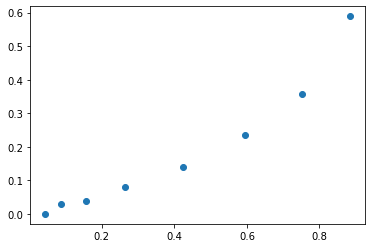

In [67]:
# Scatter plot of means
x_axis=score_bins_df['Predicted Death Rate']
y_axis=score_bins_df['Actual Death Rate']
plt.plot(x_axis, y_axis, 'o')